In [11]:
from Read.readfile.csvio import read_csv_file, write_csv_file
import matplotlib.pyplot as plt

df = read_csv_file("bd-dec22-births-deaths-by-region.csv", encoding="cp1252")

print(df.to_string())

     Period Birth_Death                                     Region  Count
0      2005      Births                           Northland region   2067
1      2005      Births                            Auckland region  20745
2      2005      Births                             Waikato region   5667
3      2005      Births                       Bay of Plenty region   3771
4      2005      Births                            Gisborne region    777
5      2005      Births                         Hawke's Bay region   2115
6      2005      Births                            Taranaki region   1410
7      2005      Births                   Manawatu-Wanganui region   3093
8      2005      Births                          Wellington region   6225
9      2005      Births                              Tasman region    513
10     2005      Births                              Nelson region    519
11     2005      Births                         Marlborough region    471
12     2005      Births               

In [10]:
print(df.columns)

Index(['Period', 'Birth_Death', 'Region', 'Count'], dtype='object')


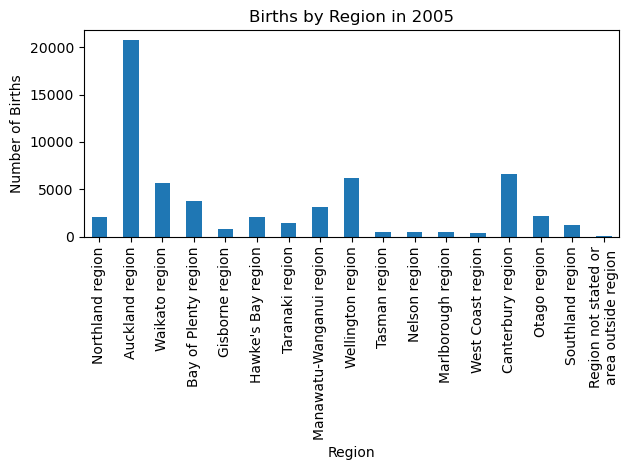

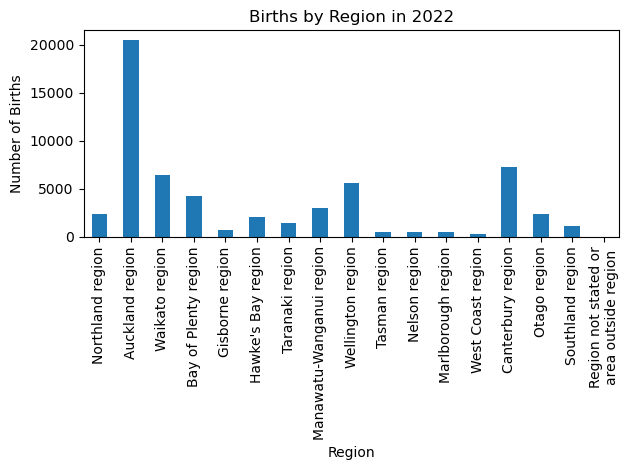

In [7]:
# Choose one or more years from the dataset
periods = [2005, 2022]  # add as many as you want

# Filter births for the given year(s)
births_filtered = df[
    (df["Birth_Death"] == "Births") &
    (df["Period"].isin(periods))
].copy()

# Remove "New Zealand" from the DataFrame. The total amount of biths in New Zealand makes the rest of the graph unreadable
births_filtered = births_filtered[births_filtered["Region"] != "New Zealand"]

# Uses a for loop to iterate through each year(period) to make seperate graphs, as to not melth them together
for year in periods:
    year_data = births_filtered[births_filtered["Period"] == year].set_index("Region")
    year_data["Count"].plot(kind="bar", legend=False)
    plt.title(f"Births by Region in {year}")
    plt.ylabel("Number of Births")
    plt.xlabel("Region")
    plt.tight_layout()
    plt.show()

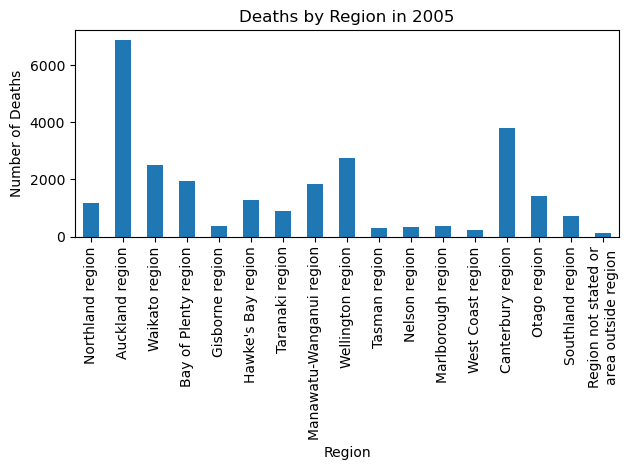

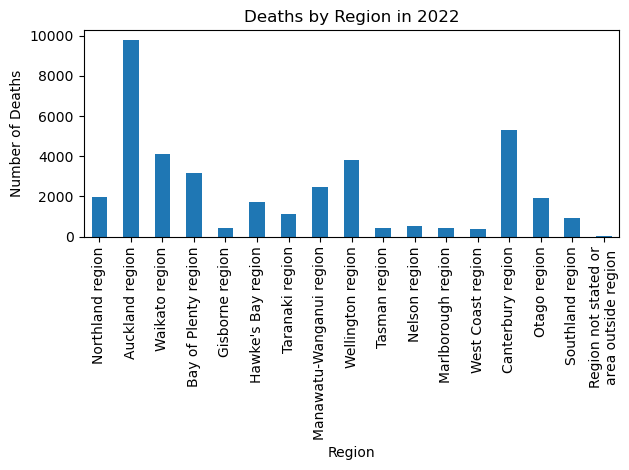

In [4]:
# Choose one or more years from the dataset
periods = [2005, 2022]  # add as many as you want

# Filter births for the given year(s)
deaths_filtered = df[
    (df["Birth_Death"] == "Deaths") &
    (df["Period"].isin(periods))
].copy()

# Remove "New Zealand" from the DataFrame. The total amount of deaths in New Zealand makes the rest of the graph unreadable
deaths_filtered = deaths_filtered[deaths_filtered["Region"] != "New Zealand"]

# Uses a for loop to iterate through each year(period) to make seperate graphs, as to not melth them together
for year in periods:
    year_data = deaths_filtered[deaths_filtered["Period"] == year].set_index("Region")
    year_data["Count"].plot(kind="bar", legend=False)
    plt.title(f"Deaths by Region in {year}")
    plt.ylabel("Number of Deaths")
    plt.xlabel("Region")
    plt.tight_layout()
    plt.show()